In [3]:
%load_ext autoreload
%autoreload 2
from utils import *
from IPython.display import display, HTML
import scipy.stats 
ins = BrainSpan()

In [4]:
ProLGD = pd.read_csv("lgd-jw.csv")
ProLGD.head(2)

,KEY,familyId,location,variant,vcfVariant,inChild,fromParent,ENSGID,effectGene,effectType,familyDescription,ENSExonIDs,ENSTransIDs,BrainSpanExonID,BrainSpanExonRowNum,isNMD
0,14320-3:127395222,14320,3:127395222,sub(T->G),3:127395222:T:G,pF,NaN,ENSG00000114626,ABTB1,noStart,pFsM,ENSE00003537266;ENSE00003616869,ENST00000393363;ENST00000232744;ENST0000046813...,ENSG00000114626:127394328,65963,False
1,13585-12:109577550,13585,12:109577550,ins(G),12:109577549:A:AG,pM,dad,ENSG00000076555,ACACB,frame-shift,pMsF,ENSE00002307745;ENSE00002274661,ENST00000539864;ENST00000377854;ENST0000037784...,ENSG00000076555:109577201,23792,True


In [5]:
csv2vcf("lgd-jw.csv", "lgd-jw.vcf")

In [6]:
ProLGD = pd.read_csv("lgd-jw.csv")
bp_exon_col_meta = pd.read_csv("./brainspan/exon_col_meta.csv")
bp_exon_row_meta = pd.read_csv("./brainspan/rows_metadata.addExonID.csv")
bp_gene_row_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/rows_metadata.csv")
bp_gene_col_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/gene_matrix/columns_metadata.csv")
bp_gene_col_meta["Period"] = bp_gene_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[0], axis=1)
bp_gene_col_meta["Stage"] = bp_gene_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[1], axis=1)
bp_gene_col_meta["Description"] = bp_gene_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[2], axis=1)
#bp_exon_row_meta = MakeExonID(bp_exon_row_meta)
display(bp_exon_row_meta.head(2))
display(bp_exon_col_meta.head(2))

,row_num,gene_id,ensembl_gene_id,gene_symbol,entrez_id,start,end,exon length,cds length,EXONID2
0,1,1086864,ENSG00000000003,TSPAN6,7105.0,99883666,99884983,1317,1317,TSPAN6_1
1,2,1086864,ENSG00000000003,TSPAN6,7105.0,99885755,99885863,108,108,TSPAN6_2


,Unnamed: 0,column_num,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name,Period,Stage,Description
0,0,1,13058,H376.IIA.51,8 pcw,M,10665,URL,upper (rostral) rhombic lip,2A,2,Early prenatal
1,1,2,13058,H376.IIA.51,8 pcw,M,10194,OFC,orbital frontal cortex,2A,2,Early prenatal


In [7]:
ProLGD[ProLGD["effectGene"]=="MFRP"]

,KEY,familyId,location,variant,vcfVariant,inChild,fromParent,ENSGID,effectGene,effectType,familyDescription,ENSExonIDs,ENSTransIDs,BrainSpanExonID,BrainSpanExonRowNum,isNMD
200,13168-11:119214625,13168,11:119214625,del(1),11:119214624:CT:C,pF,NaN,ENSG00000235718,MFRP,frame-shift,pFsF,ENSE00003561999,ENST00000449574;ENST00000555262,ENSG00000235718:119214525,268332,False


In [5]:
# ALL LGD 
LGD_GENESET = set(ProLGD["ENSGID"].values)
#SubSetBrainSpanDataGene(LGD_GENESET)
#SubSetBrainSpanData(LGD_GENESET)

In [9]:
EXON_EXP_RPKM = pd.read_csv("./brainspan/ssc.lgd.qn.exons_matrix.csv", header=None)
display(EXON_EXP_RPKM.head(2))
#GENE_EXP_RPKM = pd.read_csv("./brainspan/ssc.lgd.qn.gene_matrix.csv", header=None)
GENE_EXP_RPKM = pd.read_csv("../data/expression/brainspan/gene_matrix/qn.expression_matrix.csv", header=None)
display(GENE_EXP_RPKM.head(2))

,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,1249,13.981005,8.395309,2.331361,9.548689,13.077358,4.957344,11.519273,8.687774,8.699095,...,1.683465,1.528594,2.038370,3.015371,2.237213,2.333633,3.401376,1.251418,2.433152,4.952924
1,1250,13.693688,4.080420,1.455547,10.199496,11.281002,4.150340,14.074131,10.813428,8.187593,...,0.000000,0.452619,1.078534,1.501325,0.878050,1.277496,0.737068,1.999100,3.102934,0.000000


,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,1,30.119729,21.723763,17.127043,23.506873,17.63305,13.622681,23.655537,15.45284,37.460909,...,2.710186,1.989901,2.244615,1.965175,1.591882,2.284745,4.272780,5.938345,2.872459,3.433016
1,2,0.108485,0.101201,0.000000,0.222767,0.23954,0.310133,0.000000,0.00000,0.575702,...,0.822034,0.000000,0.050659,0.026382,0.095296,0.151563,0.326785,0.141085,0.000000,0.438327


In [10]:
Exon_Stage2Idx = {}
for stage in Stages:
    tmp = bp_exon_col_meta[bp_exon_col_meta["Period"]==stage]
    Exon_Stage2Idx[stage]=tmp["column_num"].values
Gene_Stage2Idx = {}
for stage in Stages:
    tmp = bp_gene_col_meta[bp_gene_col_meta["Period"]==stage]
    Gene_Stage2Idx[stage]=tmp["column_num"].values

In [11]:
exonid2cds = pd.read_csv("../data/Andy-brainspan/brainspan_exon_cds.tsv", delimiter="\t")
exonid2cds.head(2)
exonid2cds = dict(zip(exonid2cds["exon_id"].values, exonid2cds["cds_len"].values))
#geneid2cds = GetGeneCDS(bp_exon_row_meta, LGD_GENESET, exonid2cds)
#geneid2cds = GetGeneCDS(bp_exon_row_meta, bp_gene_row_meta["ensembl_gene_id"].values, exonid2cds)
geneid2cds = GetGeneCDS(bp_exon_row_meta, bp_gene_row_meta, exonid2cds)

In [13]:
GeneID2EXP_mean = GetGeneTimeExp(GENE_EXP_RPKM, Gene_Stage2Idx)
#GeneID2EXP_median = GetGeneTimeExp(GENE_EXP_RPKM, Gene_Stage2Idx, stat="median")
GeneID2EXP_log2 = GetGeneTimeExp(GENE_EXP_RPKM, Gene_Stage2Idx, stat="mean", log2=True)
#GeneID2EXP_log2_median = GetGeneTimeExp(GENE_EXP_RPKM, Gene_Stage2Idx, stat="median", log2=True)
GeneID2EXP_raw = GetGeneTimeExp_mwu_bias(GENE_EXP_RPKM)
GeneID2EXP_raw_log2 = GetGeneTimeExp_mwu_bias(GENE_EXP_RPKM, log2=True)

KeyboardInterrupt: 

In [14]:
ExonID2EXP_mean = GetExonTimeExp(EXON_EXP_RPKM, Gene_Stage2Idx)
ExonID2EXP_median = GetExonTimeExp(EXON_EXP_RPKM, Gene_Stage2Idx, stat="median")
ExonID2EXP_log2 = GetExonTimeExp(EXON_EXP_RPKM, Gene_Stage2Idx, stat="mean", log2=True)
ExonID2EXP_log2_median = GetExonTimeExp(EXON_EXP_RPKM, Gene_Stage2Idx, stat="median", log2=True)
ExonID2EXP_raw = GetExonTimeExp_mwu_bias(EXON_EXP_RPKM)
ExonID2EXP_raw_log2 = GetExonTimeExp_mwu_bias(EXON_EXP_RPKM, log2=True)

In [15]:
Exon_Coord = pd.read_csv("../data/Andy-brainspan/BrainSpan_RNAseq_Gencode_Exon_Coordinates.flat", 
    delimiter="\t")
Exon_Coord.head(2)
Exon_Coord["length"] = Exon_Coord["end_post"] - Exon_Coord["start_post"]
ExonID2Length = dict(zip(Exon_Coord["exon_id"].values, Exon_Coord["length"].values))
ExonID2Length = exonid2cds

In [8]:
wigler_fam_info = pd.read_excel("/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_1.xlsx")
famID2Gender = dict(zip(wigler_fam_info["familyId"].values, wigler_fam_info["probandGender"].values))
famID2VIQ = dict(zip(wigler_fam_info["familyId"].values, wigler_fam_info["probandVIQ"].values))
famID2NVIQ = dict(zip(wigler_fam_info["familyId"].values, wigler_fam_info["probandNVIQ"].values))
ProLGD["ExonID"] = ProLGD["BrainSpanExonRowNum"]
ProLGD['NVIQ'] = ProLGD.apply (lambda row: famID2NVIQ[row["familyId"]], axis=1)

In [10]:
wigler_fam_info.head(2)
ProLGD.head(2)

,KEY,familyId,location,variant,vcfVariant,inChild,fromParent,ENSGID,effectGene,effectType,familyDescription,ENSExonIDs,ENSTransIDs,BrainSpanExonID,BrainSpanExonRowNum,isNMD,ExonID,NVIQ
0,14320-3:127395222,14320,3:127395222,sub(T->G),3:127395222:T:G,pF,NaN,ENSG00000114626,ABTB1,noStart,pFsM,ENSE00003537266;ENSE00003616869,ENST00000393363;ENST00000232744;ENST0000046813...,ENSG00000114626:127394328,65963,False,65963,38.0
1,13585-12:109577550,13585,12:109577550,ins(G),12:109577549:A:AG,pM,dad,ENSG00000076555,ACACB,frame-shift,pMsF,ENSE00002307745;ENSE00002274661,ENST00000539864;ENST00000377854;ENST0000037784...,ENSG00000076555:109577201,23792,True,23792,65.0


In [11]:
wigler_fam_info = wigler_fam_info[wigler_fam_info["familyId"].isin(ProLGD["familyId"].values)]

In [12]:
print(wigler_fam_info[wigler_fam_info["probandNVIQ"]>=70].shape[0])
print(wigler_fam_info[wigler_fam_info["probandNVIQ"]<70].shape[0])

247
115


In [13]:
247/(247+115)

0.6823204419889503

In [18]:
ExonPool_log2 = PoolTheExons2(ins, ExonID2EXP_log2, ProLGD, LGD_GENESET, bp_exon_row_meta, ExonID2Length,
                       minLog2RPKMplus1Cut = 1, biasmethod="-")
ExonPool_mean = PoolTheExons2(ins, ExonID2EXP_mean, ProLGD, LGD_GENESET, bp_exon_row_meta, ExonID2Length,
                       minLog2RPKMplus1Cut = 1, biasmethod="/")

In [19]:
Bins_4_log2 = BinExon(ExonPool_log2)

In [21]:
PlotExonBins(Bins_4_log2)

PlotExonHist(Bins_4_log2)

AttributeError: 'EXON' object has no attribute 'exonExp_tmp'

In [159]:
GenePool_mwu = PoolTheGenes2_mnw_bias(ins, GeneID2EXP_raw, GeneID2EXP_mean, ProLGD, LGD_GENESET, 
                bp_gene_row_meta, geneid2cds, minLog2RPKMplus1Cut = 1, biasmethod="/")
GenePool_mwu_0 = PoolTheGenes2_mnw_bias(ins, GeneID2EXP_raw, GeneID2EXP_mean, ProLGD, LGD_GENESET, 
                bp_gene_row_meta, geneid2cds, minLog2RPKMplus1Cut = 0, biasmethod="/")
GenePool_mwu_log2 = PoolTheGenes2_mnw_bias(ins, GeneID2EXP_raw_log2, GeneID2EXP_log2, ProLGD, LGD_GENESET, 
                bp_gene_row_meta, geneid2cds, minLog2RPKMplus1Cut = 1, biasmethod="-")
GenePool_mwu_log2_0 = PoolTheGenes2_mnw_bias(ins, GeneID2EXP_raw_log2, GeneID2EXP_log2, ProLGD, LGD_GENESET, 
                bp_gene_row_meta, geneid2cds, minLog2RPKMplus1Cut = 0, biasmethod="-")

In [160]:
ExonPool_mwu = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw, ExonID2EXP_mean, ProLGD, LGD_GENESET, bp_exon_row_meta, ExonID2Length,
                       minLog2RPKMplus1Cut = 1, biasmethod="/")
ExonPool_mwu_0 = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw, ExonID2EXP_mean, ProLGD, LGD_GENESET, bp_exon_row_meta, ExonID2Length,
                       minLog2RPKMplus1Cut = 0, biasmethod="/")
ExonPool_mwu_log2 = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw_log2, ExonID2EXP_log2, ProLGD, LGD_GENESET, bp_exon_row_meta, ExonID2Length,
                       minLog2RPKMplus1Cut = 1, biasmethod="-")
ExonPool_mwu_log2_0 = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw_log2, ExonID2EXP_log2, ProLGD, LGD_GENESET, bp_exon_row_meta, ExonID2Length,
                       minLog2RPKMplus1Cut = 0, biasmethod="-")

In [161]:
Gene_Bins_3_mwu = BinExon_mwu_bias(GenePool_mwu, Nbins=3, PvalueCut = 1e-3)
Gene_Bins_3_mwu_0 = BinExon_mwu_bias(GenePool_mwu_0, Nbins=3)
Gene_Bins_3_mwu_log2 = BinExon_mwu_bias(GenePool_mwu_log2, Nbins=3, cut=0, PvalueCut = 1e-3)
Gene_Bins_3_mwu_log2_0 = BinExon_mwu_bias(GenePool_mwu_log2_0, Nbins=3, cut=0)

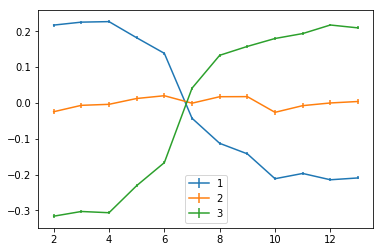

In [162]:
#PlotExonBins(Gene_Bins_3_mwu, Nbins=3, gene=True)
#PlotExonBins(Gene_Bins_3_mwu_0, Nbins=3, gene=True)
PlotExonBins(Gene_Bins_3_mwu_log2, Nbins=3, gene=True)
#PlotExonBins(Gene_Bins_3_mwu_log2_0, Nbins=3, gene=True)

All proband binom P: 0.0027232223211520372 0.0003610523227145013
NighIQ proband binom P: 0.015266723114818827 0.003527621221254379
LowIQ proband binom P: 0.000794434027941297 0.0015674027846318017


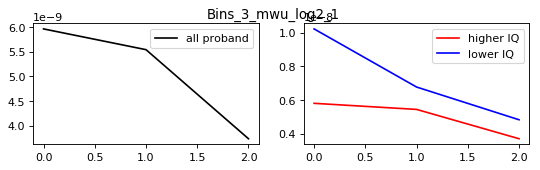

In [167]:
#GeneBinsBurden(Gene_Bins_3_mwu, Nbins=3, title="Bins_3_mwu_1")
#GeneBinsBurden(Gene_Bins_3_mwu_0, Nbins=3, title="Bins_3_mwu_0")
GeneBinsBurden(Gene_Bins_3_mwu_log2, Nbins=3, title="Bins_3_mwu_log2_1")
#GeneBinsBurden(Gene_Bins_3_mwu_log2_0, Nbins=3, title="Bins_3_mwu_log2_0")

In [114]:
Exon_Bins_3_mwu = BinExon_mwu_bias(ExonPool_mwu, Nbins=3)
Exon_Bins_3_mwu_0 = BinExon_mwu_bias(ExonPool_mwu_0, Nbins=3)
Exon_Bins_3_mwu_log2 = BinExon_mwu_bias(ExonPool_mwu_log2, Nbins=3, cut=0, PvalueCut = 1e-3)
Exon_Bins_3_mwu_log2_0 = BinExon_mwu_bias(ExonPool_mwu_log2_0, Nbins=3, cut=0)

In [115]:
#for exon in Bins_3_mwu_log2[2]:
#    print(exon.relbias, exon.pvalue)

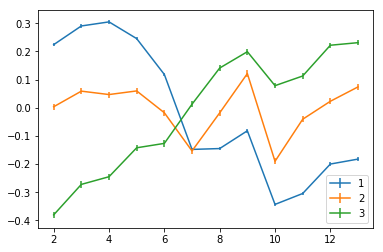

In [116]:
#PlotExonBins(Exon_Bins_3_mwu, Nbins=3)
#PlotExonBins(Exon_Bins_3_mwu_0, Nbins=3)
PlotExonBins(Exon_Bins_3_mwu_log2, Nbins=3)
#PlotExonBins(Exon_Bins_3_mwu_log2_0, Nbins=3)

All proband binom P: 0.21064148238928743 0.04310232401277041
NighIQ proband binom P: 0.8356811300531641 0.12909621835455803
LowIQ proband binom P: 0.09185319276255904 0.17323803299579044


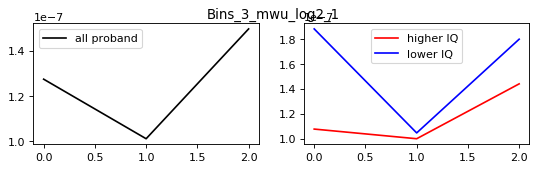

In [168]:
#PlotExonBins(Bins_3_mwu,Nbins=3)
#ExonBinsBurden(Exon_Bins_3_mwu, Nbins=3, title="Bins_3_mwu_1")
#ExonBinsBurden(Exon_Bins_3_mwu_0, Nbins=3, title="Bins_3_mwu_0")
ExonBinsBurden(Exon_Bins_3_mwu_log2, Nbins=3, title="Bins_3_mwu_log2_1", Null="NS")
#ExonBinsBurden(Exon_Bins_3_mwu_log2_0, Nbins=3, title="Bins_3_mwu_log2_0")

All proband binom P: 0.003188465924571654 0.0005789527401375678
NighIQ proband binom P: 0.8356811300531641 0.12909621835455803
LowIQ proband binom P: 0.09185319276255904 0.17323803299579044


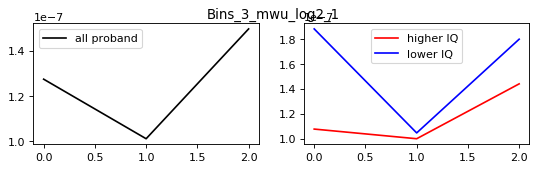

In [171]:
#PlotExonBins(Bins_3_mwu,Nbins=3)
#ExonBinsBurden(Exon_Bins_3_mwu, Nbins=3, title="Bins_3_mwu_1")
#ExonBinsBurden(Exon_Bins_3_mwu_0, Nbins=3, title="Bins_3_mwu_0")
ExonBinsBurden(Exon_Bins_3_mwu_log2, Nbins=3, title="Bins_3_mwu_log2_1", Null="NS")
#ExonBinsBurden(Exon_Bins_3_mwu_log2_0, Nbins=3, title="Bins_3_mwu_log2_0")

In [ ]:
# Compare 2 Jon's
exon_bins = "brainspan/prenatal-bias-exon-jc.csv"
gene_bins = "brainspan/prenatal-bias-gene-jc.csv"

In [163]:
HighConfProLGD = pd.read_excel("./data/ProLGD_wilger2014_predicted.July20.xlsx",index=False)
HighConfProLGD_GENE_SYMBOL = set(HighConfProLGD["effectGene"].values)
HighConfProLGD = ProLGD[ProLGD["effectGene"].isin(HighConfProLGD_GENE_SYMBOL)]
HighConfProLGD_GENE_ID = set(HighConfProLGD["ENSGID"].values)

In [164]:
ExonPool_mwu = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw, ExonID2EXP_mean, HighConfProLGD, HighConfProLGD_GENE_ID, 
                    bp_exon_row_meta, ExonID2Length, minLog2RPKMplus1Cut = 1, biasmethod="/")
ExonPool_mwu_0 = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw, ExonID2EXP_mean, HighConfProLGD, HighConfProLGD_GENE_ID, 
                    bp_exon_row_meta, ExonID2Length, minLog2RPKMplus1Cut = 0, biasmethod="/")
ExonPool_mwu_log2 = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw_log2, ExonID2EXP_log2, HighConfProLGD, 
                    HighConfProLGD_GENE_ID, bp_exon_row_meta, ExonID2Length, minLog2RPKMplus1Cut = 1, biasmethod="-")
ExonPool_mwu_log2_0 = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw_log2, ExonID2EXP_log2, HighConfProLGD, 

                                             HighConfProLGD_GENE_ID, bp_exon_row_meta, ExonID2Length, minLog2RPKMplus1Cut = 0, biasmethod="-")

In [ ]:
Nhigh = 0
Nlow = 0
for exon in ExonPool_mwu_log2:
    if exon.is

In [165]:
Bins_3_mwu = BinExon_mwu_bias(ExonPool_mwu, Nbins=3)
Bins_3_mwu_0 = BinExon_mwu_bias(ExonPool_mwu_0, Nbins=3)
Bins_3_mwu_log2 = BinExon_mwu_bias(ExonPool_mwu_log2, Nbins=3, cut=0)
Bins_3_mwu_log2_0 = BinExon_mwu_bias(ExonPool_mwu_log2_0, Nbins=3, cut=0)

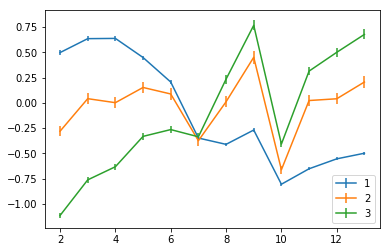

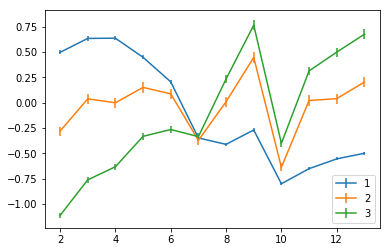

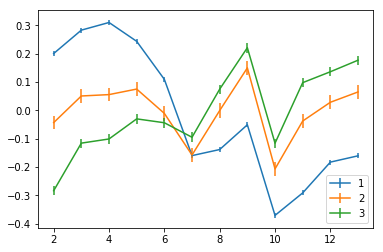

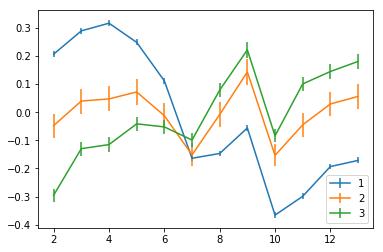

In [166]:
PlotExonBins(Bins_3_mwu, Nbins=3)
PlotExonBins(Bins_3_mwu_0, Nbins=3)
PlotExonBins(Bins_3_mwu_log2, Nbins=3)
PlotExonBins(Bins_3_mwu_log2_0, Nbins=3)

1352 87 283510
159 4 24678
353 27 73067


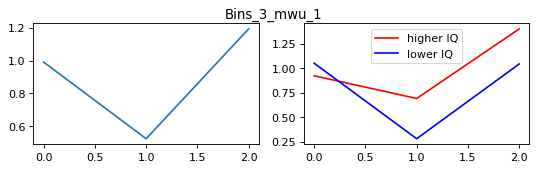

1508 89 297885
319 9 31338
440 27 77780


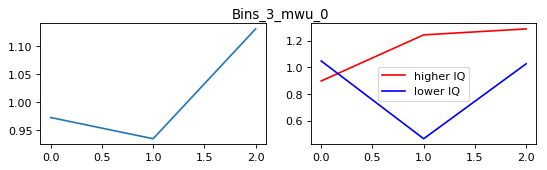

1326 88 280550
150 4 23690
330 24 68676


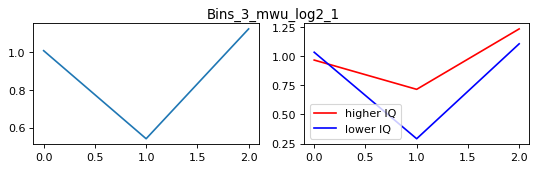

1521 91 301177
319 9 31338
427 25 74488


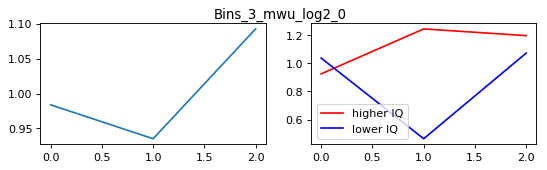

In [167]:
#PlotExonBins(Bins_3_mwu,Nbins=3)
ExonBinsBurden(Bins_3_mwu, Nbins=3, title="Bins_3_mwu_1")
ExonBinsBurden(Bins_3_mwu_0, Nbins=3, title="Bins_3_mwu_0")
ExonBinsBurden(Bins_3_mwu_log2, Nbins=3, title="Bins_3_mwu_log2_1")
ExonBinsBurden(Bins_3_mwu_log2_0, Nbins=3, title="Bins_3_mwu_log2_0")

In [169]:
RecProLGD = pd.read_csv("unifiedmodel/features.65.jiayao.csv")
RecProLGD_GENE_SYMBOL = set(RecProLGD["effectGene"].values)
RecProLGD = ProLGD[ProLGD["effectGene"].isin(RecProLGD_GENE_SYMBOL)]
RecProLGD_GENE_ID = set(RecProLGD["ENSGID"].values)

In [170]:
ExonPool_mwu = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw, ExonID2EXP_mean, HighConfProLGD, HighConfProLGD_GENE_ID, bp_exon_row_meta, ExonID2Length,
                       minLog2RPKMplus1Cut = 1, biasmethod="/")
ExonPool_mwu_0 = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw, ExonID2EXP_mean, HighConfProLGD, HighConfProLGD_GENE_ID, bp_exon_row_meta, ExonID2Length,
                       minLog2RPKMplus1Cut = 0, biasmethod="/")
ExonPool_mwu_log2 = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw_log2, ExonID2EXP_log2, HighConfProLGD, HighConfProLGD_GENE_ID, bp_exon_row_meta, ExonID2Length,
                       minLog2RPKMplus1Cut = 1, biasmethod="-")
ExonPool_mwu_log2_0 = PoolTheExons2_mnw_bias(ins, ExonID2EXP_raw_log2, ExonID2EXP_log2, HighConfProLGD, HighConfProLGD_GENE_ID, bp_exon_row_meta, ExonID2Length,
                       minLog2RPKMplus1Cut = 0, biasmethod="-")

In [171]:
Bins_3_mwu = BinExon_mwu_bias(ExonPool_mwu, Nbins=3)
Bins_3_mwu_0 = BinExon_mwu_bias(ExonPool_mwu_0, Nbins=3)
Bins_3_mwu_log2 = BinExon_mwu_bias(ExonPool_mwu_log2, Nbins=3, cut=0)
Bins_3_mwu_log2_0 = BinExon_mwu_bias(ExonPool_mwu_log2_0, Nbins=3, cut=0)

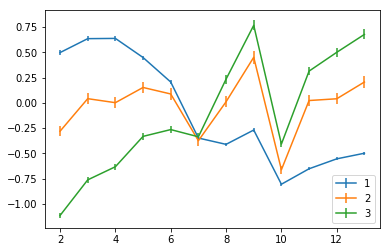

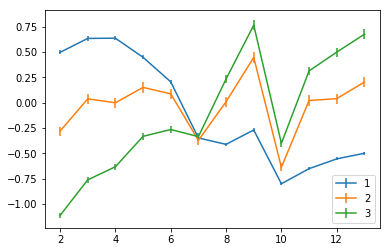

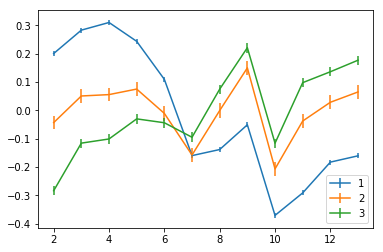

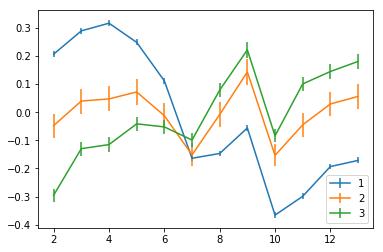

In [172]:
#PlotExonBins(Bins_3_mwu, Nbins=3)
#PlotExonBins(Bins_3_mwu_0, Nbins=3)
#PlotExonBins(Bins_3_mwu_log2, Nbins=3)
#PlotExonBins(Bins_3_mwu_log2_0, Nbins=3)

1352 87 283510
159 4 24678
353 27 73067
87 4 283510 24678 0.9199255000194686
binom P: 0.2485739807781342 0.14698391071213568


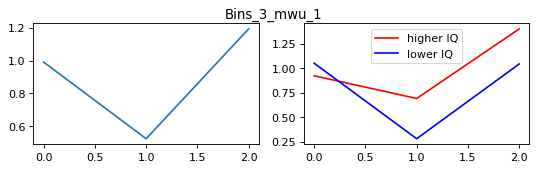

1508 89 297885
319 9 31338
440 27 77780
89 9 297885 31338 0.904812239728087
binom P: 1.0 0.7150861931713489


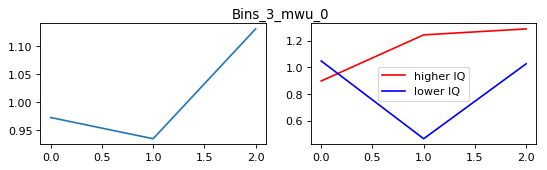

1326 88 280550
150 4 23690
330 24 68676
88 4 280550 23690 0.922133841703918
binom P: 0.32625588512539083 0.19901793532642764


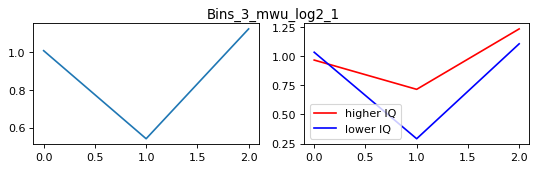

1521 91 301177
319 9 31338
427 25 74488
91 9 301177 31338 0.9057546276107845
binom P: 1.0 0.8512903211057508


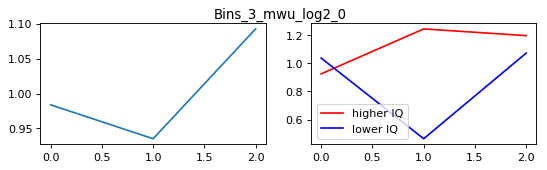

In [178]:
ExonBinsBurden(Bins_3_mwu, Nbins=3, title="Bins_3_mwu_1")
ExonBinsBurden(Bins_3_mwu_0, Nbins=3, title="Bins_3_mwu_0")
ExonBinsBurden(Bins_3_mwu_log2, Nbins=3, title="Bins_3_mwu_log2_1")
ExonBinsBurden(Bins_3_mwu_log2_0, Nbins=3, title="Bins_3_mwu_log2_0")